In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
import warnings 
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('covid.csv')
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [5]:
df.shape

(23688, 5)

In [6]:
df.columns

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [8]:
df.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


In [9]:
df.Recovered.unique()

array([    0,    28,    30, ...,  7575, 15982,  2636], dtype=int64)

In [10]:
df.Recovered.value_counts()

0         11100
1           866
2           517
4           264
3           262
          ...  
4869          1
41731         1
361239        1
8063          1
6141          1
Name: Recovered, Length: 3303, dtype: int64

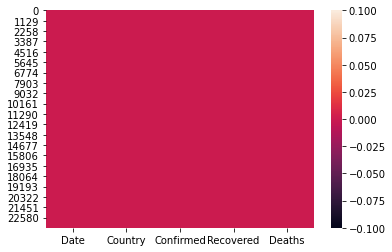

In [11]:
sns.heatmap(df.isnull())

In [12]:
dfcor=df.corr()
dfcor

,Confirmed,Recovered,Deaths
Confirmed,1.000000,0.810991,0.929718
Recovered,0.810991,1.000000,0.778094
Deaths,0.929718,0.778094,1.000000


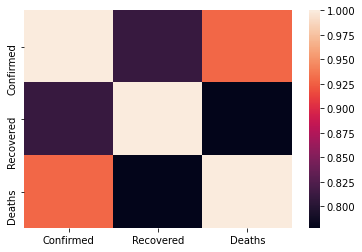

In [13]:
sns.heatmap(dfcor)

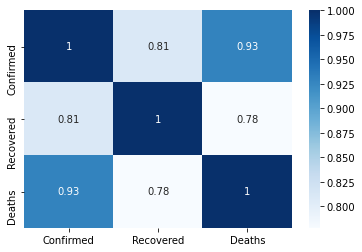

In [14]:
sns.heatmap(dfcor,cmap='Blues',annot=True)

In [15]:
df.columns

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

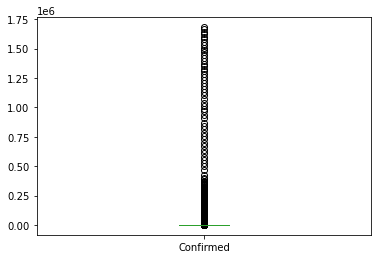

In [16]:
df['Confirmed'].plot.box()

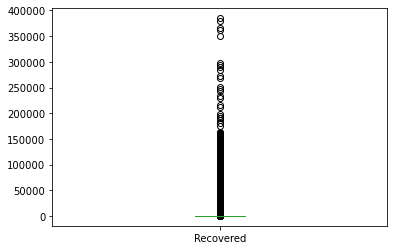

In [17]:
df['Recovered'].plot.box()

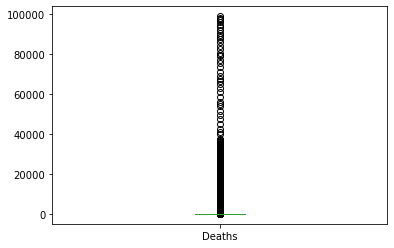

In [18]:
df['Deaths'].plot.box()

In [19]:
df.shape

(23688, 5)

In [20]:
collist=df.columns.values
ncol=10
nrows=5

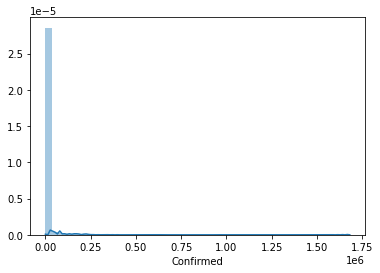

In [21]:
sns.distplot(df['Confirmed'])

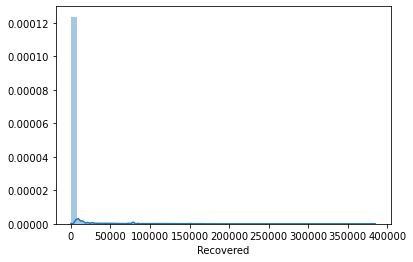

In [22]:
sns.distplot(df['Recovered'])

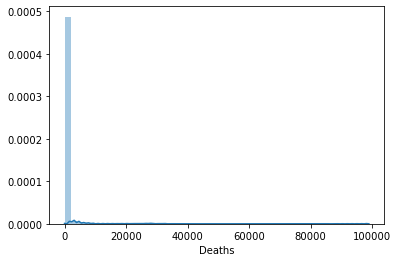

In [23]:
sns.distplot(df['Deaths'])

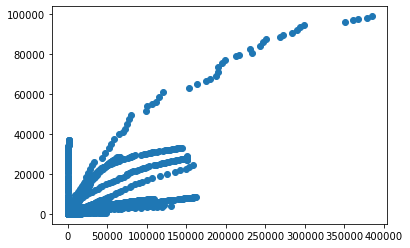

In [24]:
plt.scatter(df['Recovered'],df['Deaths'])

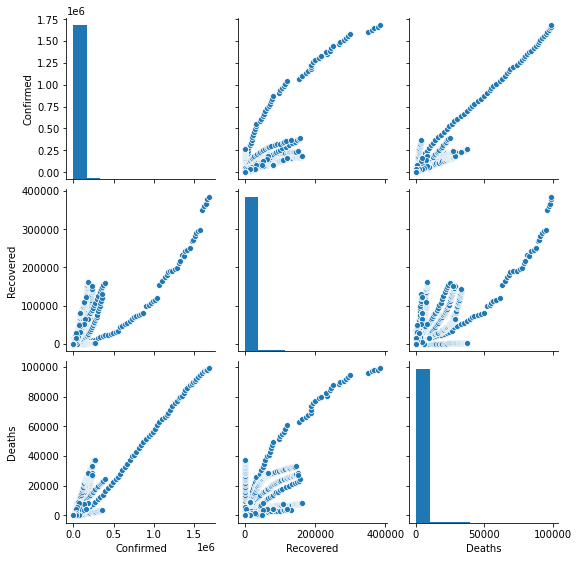

In [25]:
sns.pairplot(df)

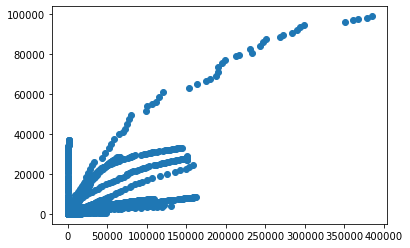

In [26]:
plt.scatter(df['Recovered'],df['Deaths'])
plt.show()

In [27]:
df.drop('Recovered',axis=1,inplace=True)

In [28]:
df.head()

,Date,Country,Confirmed,Deaths
0,2020-01-22,Afghanistan,0,0
1,2020-01-22,Albania,0,0
2,2020-01-22,Algeria,0,0
3,2020-01-22,Andorra,0,0
4,2020-01-22,Angola,0,0


In [29]:
df.shape

(23688, 4)

In [30]:
for col in df.columns:
    if df[col].dtypes=='object':
        le=LabelEncoder()
        df[col]=le.fit_transform(df[col])

In [31]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.71835849, 1.72286214, 0.13641539, 0.13197356],
       [1.71835849, 1.70443581, 0.13641539, 0.13197356],
       [1.71835849, 1.68600948, 0.13641539, 0.13197356],
       ...,
       [1.71835849, 1.68600948, 0.13215314, 0.11970126],
       [1.71835849, 1.70443581, 0.12066732, 0.13022038],
       [1.71835849, 1.72286214, 0.13545681, 0.13097174]])

In [32]:
threshold=3
new_df=df[(z<3).all(axis=1)]
new_df

,Date,Country,Confirmed,Deaths
0,0,0,0,0
1,0,1,0,0
2,0,2,0,0
3,0,3,0,0
4,0,4,0,0
...,...,...,...,...
23683,125,183,429,3
23684,125,184,9,1
23685,125,185,249,49
23686,125,186,920,7


In [33]:
print("Original shape=",df.shape, "\nNew shape=",new_df.shape )

Original shape= (23688, 4) 
New shape= (23399, 4)


In [34]:
new_df.skew()

Date         0.017494
Country      0.005058
Confirmed    6.855950
Deaths       7.553299
dtype: float64

In [35]:
x=new_df.drop("Deaths",axis=1)
y=new_df["Deaths"]

In [36]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaledX=sc.fit_transform(x)

In [37]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

best_rstate=0
accu=0
for i in range (30,200):
    x_train,x_test,y_train,y_test=train_test_split(scaledX,y,test_size=.25,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    tempaccu=r2_score(y_test,y_pred)
    if tempaccu>accu: 
        accu=tempaccu
        best_rstate=i
            
print (f"best accuracy {accu*100} found on random_state{best_rstate}")              

best accuracy 75.0002869871684 found on random_state104


In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaledX,y,test_size=.25,random_state=104)

In [39]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(LinearRegression(),x_train,y_train,cv=5).mean()
print(f"Accuracy={r2score*100}, Cross_val_score= {cvscore*100}, & difference= {(r2score*100)-(cvscore*100)}")

Accuracy=75.0002869871684, Cross_val_score= 67.00587134453862, & difference= 7.994415642629775


In [40]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(RandomForestRegressor(),x_train,y_train,cv=5).mean()
print(f"Accuracy={r2score*100}, Cross_val_score= {cvscore*100}, & difference= {(r2score*100)-(cvscore*100)}")

Accuracy=98.30401130038197, Cross_val_score= 95.93584610780982, & difference= 2.3681651925721496


In [41]:
from sklearn.ensemble import AdaBoostRegressor
ADB=AdaBoostRegressor()
ADB.fit(x_train,y_train)
y_pred=ADB.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(AdaBoostRegressor(),x_train,y_train,cv=5).mean()
print(f"Accuracy={r2score*100}, Cross_val_score= {cvscore*100}, & difference= {(r2score*100)-(cvscore*100)}")

Accuracy=82.42287034850231, Cross_val_score= 78.9598689942504, & difference= 3.463001354251915


In [42]:
from sklearn.linear_model import SGDRegressor
SGD=SGDRegressor()
SGD.fit(x_train,y_train)
y_pred=LR.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(SGDRegressor(),x_train,y_train,cv=5).mean()
print(f"Accuracy={r2score*100}, Cross_val_score= {cvscore*100}, & difference= {(r2score*100)-(cvscore*100)}")

Accuracy=75.0002869871684, Cross_val_score= 66.8235988862341, & difference= 8.1766881009343


In [43]:
parameters= {"max_iter":[500,700,900,1100,1200,1300,1400,1500],
            "alpha":[0.0001,0.001,0.01,0.1,1,10,100],
             "penalty":["elasticnet","l1","l2"]}

In [44]:
from sklearn.model_selection import GridSearchCV
GCV=GridSearchCV(SGDRegressor(),parameters,cv=5,scoring='r2')
GCV.fit(x_train,y_train)
GCV.best_estimator_
GCV_pred=GCV.best_estimator_.predict(x_test)

print("Final accuracy:", r2_score (y_test,GCV_pred)*100)

Final accuracy: 75.10605883052537


In [45]:
import joblib
joblib.dump(GCV.best_estimator_,"COVIDDEATHS.pkl")

['COVIDDEATHS.pkl']